<a href="https://colab.research.google.com/github/iagomoliv/portfolio/blob/main/notebooks/PRJT1_Analisando_os_Dados_do_Airbnb_PT_BR_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando os dados do Airbnb da cidade de Seattle

## Introdução

### Airbnb

<br>
  <center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/6/69/Airbnb_Logo_B%C3%A9lo.svg" width=20%>
  </center>
</br>

O [Airbnb](https://www.airbnb.com.br/) é uma empresa que dispensa apresentações. No entanto, se você ainda não ouviu falar dela, aqui vai uma descrição bem sucinta:

> O Airbnb **é a maior empresa hoteleira da atualidade - mesmo sem possuir nenhum hotel**. Seu objetivo é conectar pessoas que querem viajar e se hospedar com anfitriões que querem alugar seus imóveis de maneira prática.

Hoje, a empresa conta com 4 milhões de anfitriões que já receberam mais de 1 bilhão de hóspedes em quase todos os países do mundo.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de Data Science.

### Seattle

Com um florescente cenário gastronômico, bairros ecléticos e uma deslumbrante paisagem costeira, Seattle é cercada pelo lago Washington a leste e pelo *Puget Sound* (estuário de Puget) a oeste, lugares ideais para a prática de atividades aquáticas e cruzeiros turísticos.

#### O que fazer em Seattle: atrações famosas

*   A vista do observatório do topo da mundialmente famosa *Space Needle* é incrível. A atração de 185,5 metros de altura foi deixada como herança da Expo 62 e tornou-se um símbolo da cidade.

<br>
  <center>
    <img src="https://images.unsplash.com/photo-1622839497468-9e4a20007cf8?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=2850&q=80" width=50%>
   </center>
</br>

*   Moradores locais e visitantes enchem o *Pike Place Market* (Mercado Pike Place) na orla, o mais antigo mercado de produtores rurais em atividade constante dos EUA. Perca-se entre as barracas repletas de queijos artesanais, pães que acabaram de sair do forno e peixes frescos.

<br>
  <center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/6/64/Pike_Place_Market_Entrance.JPG" width=50%>
  </center>
</br>

*   Visite o *Chihuly Garden and Glass* (Jardim de Vidro Chihuly) para conhecer as notáveis obras de arte em vidro de Dale Chihuly.

<br>
  <center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/4/4f/Chihuly_Garden_and_Glass_museum_at_dusk.jpg" width=50%>
  </center>
</br>

*   Não deixe de fazer o *Boeing Tour* e conhecer a fundo as instalações de produção do jato.

<br>
  <center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/f/fa/Jetstar%27s_first_787_on_the_production_line_%289132370198%29.jpg" width=50%>
  </center>
</br>

Fonte: https://www.visiteosusa.com.br/destination/seattle.


## Objetivo

Neste notebook, nosso objetivo é analisar os dados referentes à cidade de **Seattle**, localizada no estado de Washington, nos Estados Unidos, e ver quais *insights* podem ser extraídos a partir de dados brutos.

## Configurando o ambiente de trabalho

In [ ]:
# Pacotes utilizados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Os dados foram obtidos através do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

In [ ]:
PATH = 'http://data.insideairbnb.com/united-states/wa/seattle/2021-09-25/visualisations/listings.csv';

# Importando os dados
df = pd.read_csv(PATH, index_col = 'id', dtype = {'host_id': 'str'});

## Explorando a base de dados

O objetivo desta seção é nos situar, facilitar o entendimento da base de dados a ser trabalhada.

In [ ]:
# Visão geral da base de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4249 entries, 2318 to 52446255
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            4249 non-null   object 
 1   host_id                         4249 non-null   object 
 2   host_name                       4249 non-null   object 
 3   neighbourhood_group             4249 non-null   object 
 4   neighbourhood                   4249 non-null   object 
 5   latitude                        4249 non-null   float64
 6   longitude                       4249 non-null   float64
 7   room_type                       4249 non-null   object 
 8   price                           4249 non-null   int64  
 9   minimum_nights                  4249 non-null   int64  
 10  number_of_reviews               4249 non-null   int64  
 11  last_review                     3597 non-null   object 
 12  reviews_per_month          

### Dicionário das variáveis

*   `id`: identificador único do anúncio;
*   `name`: nome do anúncio;
*   `host_id`: identificador único do anfitrião;
*   `host_name`: nome do anfitrião;
*   `neighbourhood_group`: região;
*   `neighbourhood`: bairro;
*   `latitude`: latitude (WGS84, grau decimal);
*   `longitude`: longitude (WGS84, grau decimal);
*   `room_type`: tipo de quarto/imóvel;
*   `price`: preço por noite de estadia (USD);
*   `minimum_nights`: número mínimo de noites de estadia;
*   `number_of_reviews`: quantidade de avaliações do anúncio;
*   `last_review`: data da última avaliação;
*   `reviews_per_month`: número de avaliações mensais que o anúncio recebe durante o período anunciado;
*   `calculated_host_listings_count`: número de anúncios que o anfitrião tem na mesma região;
*   `availability_365`: disponibilidade do anúncio nos próximos 365 dias;
*   `number_of_reviews_ltm`: número de avaliações nos últimos 12 meses;
*   `license`: número da licença/permissão/registro;

In [ ]:
# Verificando as 5 primeiras entradas
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
2318,Casa Madrona - Urban Oasis 1 block from the park!,2536,Megan,Central Area,Madrona,47.61094,-122.29286,Entire home/apt,449,7,35,2021-08-07,0.61,1,204,3,STR-OPLI-19-002837
6606,"Fab, private seattle urban cottage!",14942,Joyce,Other neighborhoods,Wallingford,47.65444,-122.33629,Entire home/apt,99,3,157,2021-09-14,2.42,1,0,8,str-opli-19-002622
9419,Glorious sun room w/ memory foambed,30559,Angielena,Other neighborhoods,Georgetown,47.55017,-122.31937,Private room,75,2,153,2021-07-27,1.13,9,344,5,STR-OPLI-19-003039
9531,The Adorable Sweet Orange Craftsman,31481,Cassie,West Seattle,Fairmount Park,47.55495,-122.38663,Entire home/apt,174,3,49,2021-09-07,0.55,2,265,9,STR-OPLI-19-002182
9534,The Coolest Tangerine Dream MIL!,31481,Cassie,West Seattle,Fairmount Park,47.55627,-122.38607,Entire home/apt,145,5,58,2021-04-25,0.57,2,122,5,STR-OPLI-19-002182


### Dimensão e valores ausentes

É uma base de dados que possui 4249 observações, 18 colunas/variáveis (uma coluna é o índice) e poucas dados ausentes.

In [ ]:
# Dimensão dos dados
df.shape

(4249, 17)

In [ ]:
# Proporção de valores ausentes
df.isnull().sum() / df.shape[0] * 100

name                               0.000000
host_id                            0.000000
host_name                          0.000000
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       15.344787
reviews_per_month                 15.344787
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
license                           24.782302
dtype: float64

Os dados ausentes representam de **15.34** a **24.78%** dos registros nas colunas `reviews_per_month`, `last_review` e `license`, respectivamente. São informações irrelevantes para o objetivo deste projeto. Portanto, essas colunas serão excluídas da base de dados.

In [ ]:
# Removendo as colunas 'reviews_per_month', 'last_review' e 'license'
df = df.drop(columns=['reviews_per_month', 'last_review', 'license'])

# Verificando a exclusão
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4249 entries, 2318 to 52446255
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            4249 non-null   object 
 1   host_id                         4249 non-null   object 
 2   host_name                       4249 non-null   object 
 3   neighbourhood_group             4249 non-null   object 
 4   neighbourhood                   4249 non-null   object 
 5   latitude                        4249 non-null   float64
 6   longitude                       4249 non-null   float64
 7   room_type                       4249 non-null   object 
 8   price                           4249 non-null   int64  
 9   minimum_nights                  4249 non-null   int64  
 10  number_of_reviews               4249 non-null   int64  
 11  calculated_host_listings_count  4249 non-null   int64  
 12  availability_365           

### Distribuição das variáveis numéricas

Verificando, visualmente, o comportamento e a distribuição das **variáveis numéricas de interesse**.

In [ ]:
# Variáveis numéricas de interesse
vars_num = ['price', 'minimum_nights', 'calculated_host_listings_count', 'availability_365', 'longitude', 'latitude']

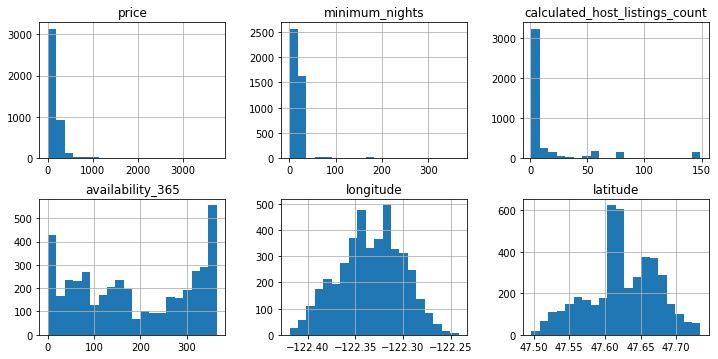

In [ ]:
# Gerando os histogramas das variáveis numéricas de interesse
df.hist(column = vars_num, figsize = (12, 9), layout = (3, 3), bins = 20);

Para ampliar ainda mais nossa visão sobre a base de dados que está sendo trabalhada, faremos o **resumo estatístico** das variáveis de interesse:

In [ ]:
# Obtendo o resumo estatístico das variáveis de interesse
df[vars_num].describe()

,price,minimum_nights,calculated_host_listings_count,availability_365,longitude,latitude
count,4249.000000,4249.000000,4249.000000,4249.000000,4249.000000,4249.000000
mean,162.846317,14.381972,14.413980,186.900212,-122.333915,47.624420
std,141.065381,19.574878,31.408496,124.665394,0.033287,0.048416
min,0.000000,1.000000,1.000000,0.000000,-122.419050,47.496790
25%,90.000000,2.000000,1.000000,73.000000,-122.356510,47.600890
50%,131.000000,3.000000,2.000000,170.000000,-122.332500,47.621200
75%,192.000000,30.000000,8.000000,316.000000,-122.309780,47.661870
max,3750.000000,365.000000,149.000000,365.000000,-122.241490,47.734010


Com base nos histogramas e no resumo estatístico das variáveis de interesse, é possível identificar a presença de *outliers*, tais como:
*   Anúncios com `price = 0`;
*   Anúncios com `price = 3750`;
*   Anúncios com `minimum_nights = 365`;
*   Anunciantes com 149 anúncios na mesma região `calculated_host_listings_count = 149`; e
*   Anúncios que não estarão disponíveis nos próximos 365 dias `availability_365 = 0`

Neste sentido, uma análise mais detalhada se faz necessária.

## Limpeza dos dados

A limpeza dos dados será feita em duas etapas:
*   Remoção de *outliers* pela definição de **limites arbitrarios**¹; e
*   Remoção de *outliers* pelo método do **Intervalo Interquartil**.

<sub>¹ Limites arbitrários baseados na realidade. Por exemplo: anúncios com o preço de US$ 0 por noite, ou anúncios com estadia mínima superior a 30 dias, serão considerados *outliers* e, portanto, serão removidos.</sub>

### Remoção de *outliers* pela definição de limites arbitrários

In [ ]:
# Mantendo uma cópia do df original
df_clean = df.copy()

# Removendo todas observações nas quais price = 0
df_clean.drop(df_clean[df_clean.price == 0].index, axis = 0, inplace = True)

# Removendo todas observações nas quais minimum_nights > 30
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis = 0, inplace = True)

In [ ]:
# Dimensões do df pós a primeira etapa da limpeza
df_clean.shape

(4129, 14)

Foram removidas **120** observações.

### Identificação e remoção de *outliers* pelo método do Intervalo Interquartil

O Itervalo Interquartil - do Inglês, [Interquartile Range (IQR)](https://en.wikipedia.org/wiki/Interquartile_range) - será utilizado para identificar e, posteriormente, remover os *outliers* da variável `price`, variável que corresponde ao preço por noite de estadia.

Na função abaixo, identificaremos, para cada variável, o terceiro e o primeiro quartil `q1`e `q2`, respectivamente. Na sequência, calcularemos o intervalo interquartil `iqr` e selecionaremos, a partir da definição do limite inferior `lower_limit` e do limite superior `lower_limit`, os outliers.

Todos as observações com valor menor que o limite inferior e maior que o limite superior serão removidos.

In [ ]:
# Criando uma função para identificar os valores que estão dentro dos limites estabelecidos
def is_outlier(s):
    q3 = s.quantile(0.75)
    q1 = s.quantile(0.25)
    iqr = q3 - q1
    lower_limit = iqr - (1.5 * iqr) # Limite inferior (LI)
    upper_limit = iqr + (1.5 * iqr) # Limite superior (LS)
    return ~s.between(lower_limit, upper_limit) # LI <= price <= LS

In [ ]:
# Aplicando a função
outliers = df_clean.groupby('neighbourhood_group').price.apply(is_outlier) # Bool

# Número de variáveis que serão removidas
print('{} observações serão removidas.'.format(outliers.value_counts()[0]))

3412 observações serão removidas.


In [ ]:
# Dimensões do df antes da limpeza
df_clean.shape

(4129, 14)

In [ ]:
# Removendo os outliers
df_clean = df_clean.loc[outliers]

In [ ]:
# Dimensões do df após a limpeza
df_clean.shape

print('Dimensões do df após a remoção dos outliers:')
print(f'{df_clean.shape[0]} L x {df_clean.shape[1]} C.')

Dimensões do df após a remoção dos outliers:
717 L x 14 C.


Ao todo, **3412** observações foram removidas da base de dados.

### Histograma após remoção dos *outliers*

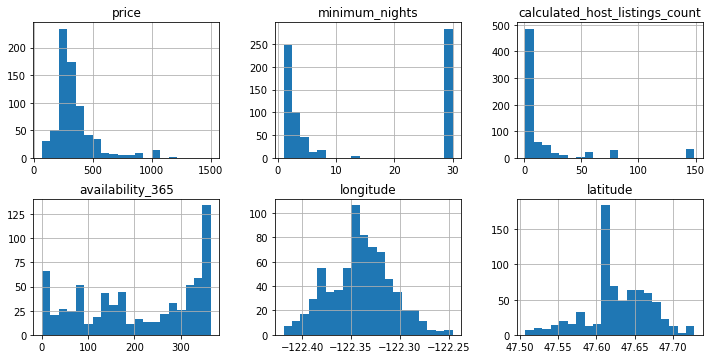

In [ ]:
df_clean.hist(column = vars_num, figsize = (12, 9), layout = (3, 3), bins = 20);

## Respondendo algumas perguntas

### Q1. Quais são as regiões com maior número de anúncios?

In [ ]:
# Agrupando os dados por região
df_group = df_clean.groupby('neighbourhood_group')

In [ ]:
# Listando as 5 regiões com maior número de anúncios
df_group.size().sort_values(ascending = False).drop('Other neighborhoods').iloc[:5]

neighbourhood_group
Downtown        174
Capitol Hill     69
West Seattle     57
Queen Anne       49
Interbay         34
dtype: int64

O valor `Other neighbourhood` foi removido desta análise pois não representa uma região específica, mas sim várias regiões.

As regiões com maior número de anúncios são: **Downtown**, **Capitol Hill**, **West Seattle**, **Queen Anne** e **Interbay**.

#### Q1.2. Nessas regiões, qual a média do número mínimo de noites de estadia?

In [ ]:
# Regiões de interesse
roi = ['Downtown', 'Capitol Hill', 'West Seattle', 'Queen Anne', 'Interbay']

In [ ]:
# Obtendo as regiões que, em média, ofertam o maior número mínimo de noites de estadia
df_clean[['neighbourhood_group', 'minimum_nights']].groupby('neighbourhood_group').mean().loc[roi].sort_values(by = 'minimum_nights', ascending = False)

,minimum_nights
neighbourhood_group,
Interbay,24.352941
Capitol Hill,16.811594
Downtown,14.942529
Queen Anne,11.244898
West Seattle,9.964912


Importante notar que mesmo sendo a quinta região com maior número de anúncios, **Interbay** oferece, em média, a estadia mais douradoura. **Downtown**, por outro lado, é a região com o maior número de anúncios e nessa região, a estadia mínima, em média, é de aproximadamente 15 dias, ou 2 semanas.

#### Q1.3. E qual o tipo de quarto/casa mais anunciado?

In [ ]:
# Número de quartos/casas em valores absolutos
df_group.room_type.value_counts().loc[roi].groupby('room_type').sum()

room_type
Entire home/apt    377
Private room         6
Name: room_type, dtype: int64

In [ ]:
# Número de quartos/casas em valores relativos
df_group.room_type.value_counts().loc[roi].groupby('room_type').sum() / df_group.room_type.value_counts().loc[roi].sum() * 100

room_type
Entire home/apt    98.43342
Private room        1.56658
Name: room_type, dtype: float64

### Q2. Quais são as regiões mais caras em Seattle?

In [ ]:
# Obtendo a média do preço por região e ordenando
df_group.price.mean().sort_values(ascending = False).iloc[:5]

neighbourhood_group
Queen Anne        548.632653
Central Area      493.739130
Ballard           474.666667
Rainier Valley    466.523810
Lake City         421.571429
Name: price, dtype: float64

Utilizando *box plots* para visualizar as informações acima:

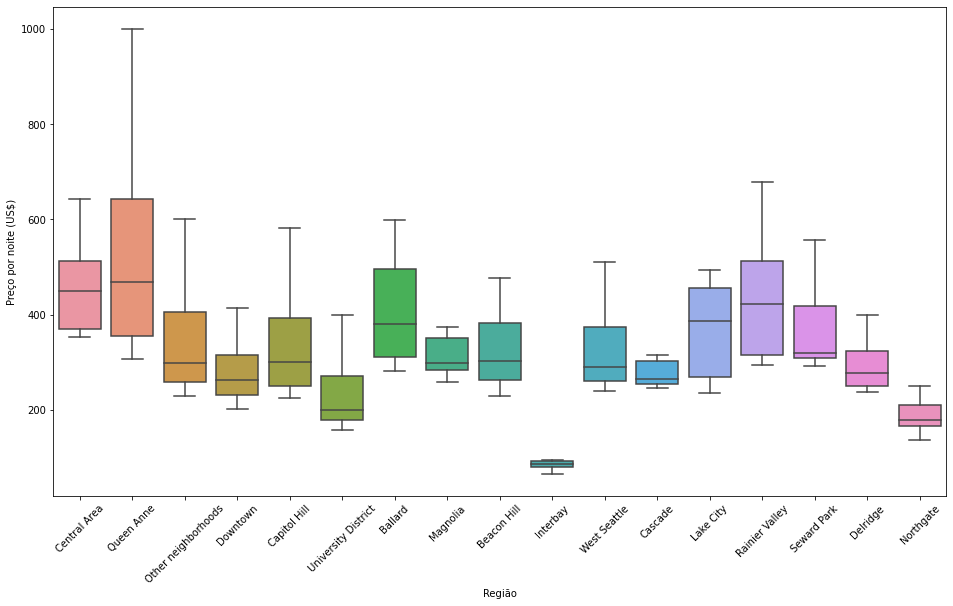

In [ ]:
plt.figure(figsize = [16, 9])
sns.boxplot(x = df_clean.neighbourhood_group, y = df_clean.price, showfliers = False) # Plot s/ os outliers
plt.xlabel('Região')
plt.ylabel('Preço por noite (US$)')
plt.xticks(rotation = 45)
plt.show()

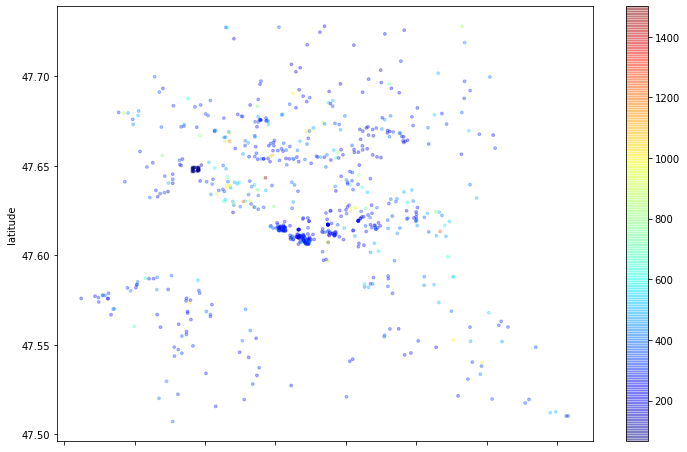

In [ ]:
# Visualizando espacialmente as informações
df_clean.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.3, c = df_clean['price'], 
              s = 8, cmap = plt.get_cmap('jet'), figsize = (12, 8));

### Q3. Qual o tipo de quarto/casa mais anunciado em Seattle?

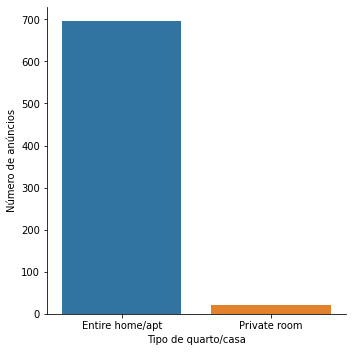

In [ ]:
# Plotando um gráfico de barras com a contagem do número de anúncios de cada tipo de quarto/casa
sns.catplot(x = 'room_type', kind = 'count', data = df_clean);
plt.xlabel('Tipo de quarto/casa')
plt.ylabel('Número de anúncios')
plt.show()

In [ ]:
# Verificando a porcentagem de cada tipo de quarto/casa
df_clean.room_type.value_counts() / df_clean.shape[0] * 100

Entire home/apt    96.93166
Private room        3.06834
Name: room_type, dtype: float64

**96.93%** dos anúncios em Seattle são do tipo **lugares inteiro**, enquanto que **3.07%** são do tipo **quartos inteiros**.

Segundo a própria empresa:

> **Lugares inteiros** são recomendados para quem procura uma casa acolhedora quando se está longe da sua. Geralmente, esse tipo de acomodação conta com quarto, banheiro, cozinha e entrada separada e exclusiva.

> **Quartos inteiros** são ótimos para quem prefere um pouco de privacidade, mas deseja conhecer pessoas do local.

### Q4. Qual a correlação existente entre as variáveis?

Existe correlação entre as informações coletadas pela Airbnb?

In [ ]:
# Gerando a matriz de correlação
corr = df_clean.corr()

# Visualizando a matriz
display(corr)

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
latitude,1.000000,-0.047604,0.016329,0.038089,0.054546,-0.028927,0.015573,-0.020804
longitude,-0.047604,1.000000,0.049682,-0.009799,-0.000041,-0.003293,-0.020359,-0.010680
price,0.016329,0.049682,1.000000,-0.021244,-0.053880,-0.230102,-0.068986,-0.118081
minimum_nights,0.038089,-0.009799,-0.021244,1.000000,-0.262815,0.422786,0.216672,-0.457812
number_of_reviews,0.054546,-0.000041,-0.053880,-0.262815,1.000000,-0.210898,-0.179876,0.597744
calculated_host_listings_count,-0.028927,-0.003293,-0.230102,0.422786,-0.210898,1.000000,0.225546,-0.238463
availability_365,0.015573,-0.020359,-0.068986,0.216672,-0.179876,0.225546,1.000000,-0.188694
number_of_reviews_ltm,-0.020804,-0.010680,-0.118081,-0.457812,0.597744,-0.238463,-0.188694,1.000000


Podemos visualizar a matriz de correlação por meio de um **heat map**.

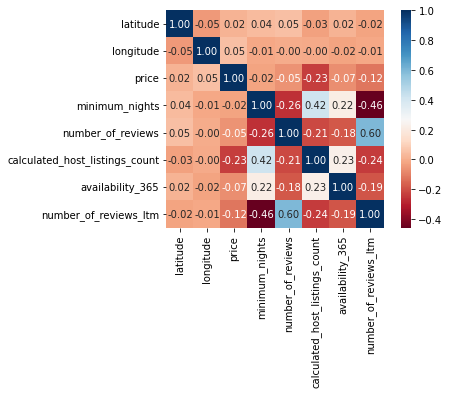

In [ ]:
sns.heatmap(corr, cmap = 'RdBu', fmt = '.2f', square = True, linecolor = 'white', annot = True);

A partir da análise de correlação entre os dados disponibilizados, podemos concluir que:

> **O número de avaliações tende a aumentar quando a estadia é mais breve**. Se o objetivo do anfitrião é aumentar o número de avaliações, o mesmo investir na rotatividade de clientes. Sendo assim, faz sentido diminuir o número mínimo de noites de estadia.

> **Quanto mais anúncios um anfitrião tiver, mais duradouras tendem a ser as estadias de seus clientes**. De acordo com os dados, os anfitriões que anunciam mais de um imóvel em Seattle oferecem estadias mais duradouras.

### Q5. Qual a proporção de anfitriões com mais de um anúncio?

In [ ]:
# Número de anfitriões com apenas um anúncio
single_listings = (df_clean.calculated_host_listings_count == 1).sum()

# O quanto representam, em porcentagem
print('Os anfritriões com apenas um anúncio/região correspondem a')
print('{:.2f}% dos anfitriões de Seattle.'.format(100 * single_listings / df_clean.shape[0]))

Os anfritriões com apenas um anúncio/região correspondem a
40.17% dos anfitriões de Seattle.


## Conclusões

O objetivo deste projeto foi realizar uma análise  inicial dos dados referentes aos anúncios feitos na cidade de Seattle, WA, EUA, pela plataforma da empresa Airbnb.

A partir dessa análise, foi possível obter informações relevantes do ponto de vista econômico/gerencial, tais como:
*   **Downtown é a região da cidade com o maior número de anúncios**. Justificável, pois essa região, também conhecida como o coração de Seattle, é bem abastecida com restaurantes de classe mundial e atrações culturais;

*   Nas regiões mais anunciadas, a estadia mínima varia de 9 a 24 noites. Em Downtown a estadia mínima é, em média, de aproximadamente 15 dias;

*   **Lugares inteiros** é o tipo de quarto mais anunciado em Seattle;

*   **Queen Anne** é a região mais cara da cidade, seguida por Central Area, Ballard, Rainier Valley e Lake City;

*   A quantidade de anúncio por anfitrião e o número de avaliações parecem ser influenciados pela duração da estadia; e

*   Mais da metade (59.83%) dos anfitriões possuem mais de um anúncio.

> A base de dados utilizados neste projeto é uma versão resumida, e não possui todos os dados coletados pela empresa.

Concluo ressaltando a importância e a necessidade da limpeza da base de dados, visto que *outliers* foram identificados em variáveis importantes, como o preço.